In [1]:
# Project description:
# Par Inc., is a major manufacturer of golf equipment. Management believes that Par’s market share could be increased with the introduction of a cut-resistant, longer-lasting golf ball. 

# Project objectives:
# Formulate and present the rationale for a hypothesis test that par could use to compare the driving distances of the current and new golf balls. 
# Analyse the data to provide the hypothesis testing conclusion. What is the p-value for your test? What is your recommendation for Par Inc.?
# Provide descriptive statistical summaries of the data for each model. 


In [2]:
# Importing all needed libraries..
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import ttest_1samp,ttest_ind,wilcoxon,mannwhitneyu,levene,shapiro
from statsmodels.stats.power import ttest_power


In [3]:
# Lets load the dataset from flat file..
par = pd.read_excel("SM4-Golf.xls")

In [4]:
par.head()

,Current,New
0,264,277
1,261,269
2,267,263
3,272,266
4,258,262


In [5]:
par.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
Current    40 non-null int64
New        40 non-null int64
dtypes: int64(2)
memory usage: 720.0 bytes


In [6]:
# Let us check whether dataset has any other non-numeric value in rows or columns...
par[~par.applymap(np.isreal).all(1)]

,Current,New


In [7]:
# since there is no output, we can conclude that there is no non-numeric values or junk characters in the dataset...
# Also after analyzing the dataset we can conclude that there is no missing values in the dataset...

In [8]:
# Lets analyze the mean,median & std for both Current & New Golf balls...
par.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Current,40.0,270.275,8.752985,255.0,263.0,270.0,275.25,289.0
New,40.0,267.500,9.896904,250.0,262.0,265.0,274.50,289.0


In [9]:
# Just by looking at the descriptive statistics for each model, we can initially conclude thatCurrent model has a longer range 
# of distance based on the 40 samples with a mean of 270.275 compare to 267.500 for new model.
# Beside, standard deviation of current is 8.75 and of new is 9.89. Although, two value of mean is different 
# but Sd also is quite large so we can say they are quite same.

In [10]:
# Lets plot the boxplot to visualize quartile range and the outliers..

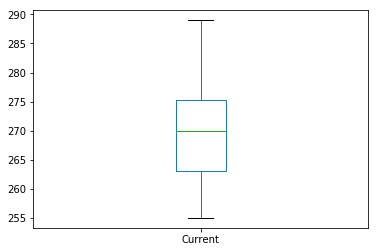

In [11]:
par['Current'].plot(kind='box')

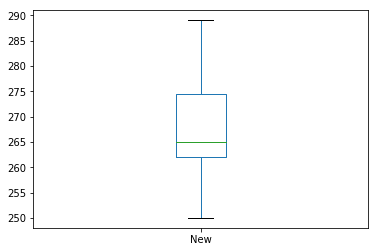

In [12]:
par['New'].plot(kind='box')

In [30]:
# Lets plot the difference histogram..

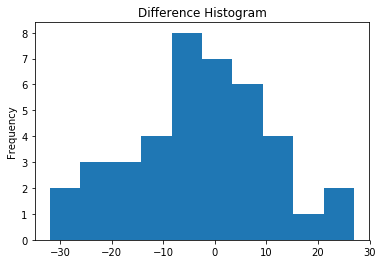

In [13]:
par['diff'] = par['New'] - par['Current']
par['diff'].plot(kind='hist', title= 'Difference Histogram')

In [31]:
# Hypothesis Testing:
# The Null hypothesis and alternative hypothesis are formulated as follow: 
# Mean distance of current-model balls: µ1. 
# Mean distance of new cut-resistant balls: µ2. 
# Null Hypothesis      H0: µ1 = µ2 (Mean distance of current balls equals mean distance of new balls).
# Alternate Hypothesis H1: µ1 ≠ µ2 (Mean distance of current balls is not equal mean distance of new  balls) 
# Specify the level of significance. 
# α = 0.05 so z = 1.96

In [32]:
# Lets perform 2 Sample testing:
t_statistic,p_value = ttest_ind(par.Current, par.New)
print(t_statistic,p_value)

1.3283615935245678 0.18793228491854663


In [16]:
# so the p-value is 0.18..which is greater than level of significance (0.05)...hence we cannot reject the H0(null hypothesis).
# the new cut-resistant balls have no difference in distance compared to the current-model one..

In [33]:
# Lets perform other tests as well..

In [17]:
u, p_value = mannwhitneyu(par.Current, par.New)
print(u, p_value)


668.0 0.10265192122893124


In [18]:
t_statistic,p_value = ttest_1samp(par.New-par.Current,0)
print(t_statistic,p_value)

-1.2769699827911767 0.20916361823147053


In [19]:
z_statistic,p_value = wilcoxon(par.New-par.Current)
print(z_statistic,p_value)

291.5 0.2516033447950283


In [20]:
levene(par.Current,par.New)

LeveneResult(statistic=0.2553238291765741, pvalue=0.6147759523331309)

In [21]:
shapiro(par.New)

(0.9678263664245605, 0.3064655363559723)

In [22]:
# Pooled Standard deviation Calculation:

In [23]:
(np.mean(par.Current) - np.mean(par.New)) / np.sqrt(((40-1)*np.var(par.Current) + (40-1)*np.var(par.New)) / 40+40-2)

0.19431534815781365

In [24]:
#So Delta = 0.19

In [25]:
# Lets calculate the power of test:

In [37]:
print(ttest_power(0.19, nobs=40, alpha=0.05, alternative="two-sided"))

0.21628588242534494


In [38]:
# Power of test shows only 21% least possibility is there to reject the Null hypothesis or the Null hypothesis to be false...

In [40]:
# Conclusion:
# By lookin at the descriptive statistics for each model, we can initially conclude that Current model has a longer range
# of distance based on the 40 samples with a mean of 270.275 (calculated in excel) compare to 267.500 for new model. 
# Beside, standard deviation of current is 8.75 and of new is 9.89. Although, two value of mean is different 
# but Sd also is quite large so we can say they are quite same..
# P-Value for this two sample test is 0.1879, which is greater than level of significance α (0.05). 
# Hence, H0 will not be rejected which shows that Par, Inc. should take a new ball in production as the P value indicates that 
# there is no significant difference between estimated population mean of current as well new sample model.
# Also the Power of test shows that only 21% least possibility is there to reject Null hypothesis or the Null hypothesis to be false...
# So based on the above test results, our recommendation for the company (Par, Inc.) is not to introduce the new cut-resistant, longer lasting golf ball in the market..
# And to continue with the further study of the improved cut-resistant, longer lasting golf ball before finalizing and launching the project..